In [1]:
"""
iCESM read R18O
  Read proxy data
  get lat/lon
  read nc file of iCESM in lat/lon grid
  get the average value of the site
  
  By Mingsong Li
  July 21 2020
  
  Comment: works very well
  
"""
from netCDF4 import Dataset
import numpy as np
import pandas
import math
from sys import platform as sys_pf
import matplotlib.pyplot as plt
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")
    import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap, shiftgrid, cm

In [6]:
r18odir = '/mnt/d/iCESM/PETM/'
r18olist = ['c.b.e12.B1850C5CN.f19_g16.iPETM01x.01.lat.h.R18O.257001-259912.nc',
           'c.b.e12.B1850C5CN.f19_g16.iPETM03x.02.lat.h.R18O.198001-200012.nc',
           'c.b.e12.B1850C5CN.f19_g16.iPETM06x.07.lat.h.R18O.198001-200012.nc',
           'c.b.e12.B1850C5CN.f19_g16.iPETM09x.01.lat.h.R18O.198001-200012.nc']

r18olist = ['x1R18O.nc','x3R18O.nc','x6R18O.nc','x9R18O.nc']
varName = 'TEMP'
#print(r18olist[1])
proxydir = '/mnt/c/Users/mul450/Dropbox/git/deepDA/mlwrk/proxy/'
proxyfile = 'petmproxy3slices_v0.0.16a.csv'
proxyfile = 'v18.csv'

r18oCESMname = 'v18_r18OCESMx1369.csv'

latid = 'latbc'
lonid = 'lonbc'
typei = 'd18O'

x1R18O.nc
(240, 180, 360)
site 277. lat/lon -58.15/-168.55 id 31/191. mean -2.01187
site 277. lat/lon -58.15/-168.55 id 31/191. mean -2.01187
site 689. lat/lon -70.0/4.15 id 20/4. mean -1.50350
site 689. lat/lon -70.0/4.15 id 20/4. mean -1.50350
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.47067
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.47067
x3R18O.nc
(240, 180, 360)
site 277. lat/lon -58.15/-168.55 id 31/191. mean -2.13343
site 277. lat/lon -58.15/-168.55 id 31/191. mean -2.13343
site 689. lat/lon -70.0/4.15 id 20/4. mean -1.43064
site 689. lat/lon -70.0/4.15 id 20/4. mean -1.43064
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.56585
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.56585


/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


x6R18O.nc
(240, 180, 360)
site 277. lat/lon -58.15/-168.55 id 31/191. mean -2.61091
site 277. lat/lon -58.15/-168.55 id 31/191. mean -2.61091
site 689. lat/lon -70.0/4.15 id 20/4. mean -2.41483
site 689. lat/lon -70.0/4.15 id 20/4. mean -2.41483
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.42203
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.42203
x9R18O.nc
(240, 180, 360)
site 277. lat/lon -58.15/-168.55 id 31/191. mean -3.19131
site 277. lat/lon -58.15/-168.55 id 31/191. mean -3.19131
site 689. lat/lon -70.0/4.15 id 20/4. mean -3.45395
site 689. lat/lon -70.0/4.15 id 20/4. mean -3.45395
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.79403
site Milville. lat/lon 38.25/-56.0 id 128/304. mean -0.79403


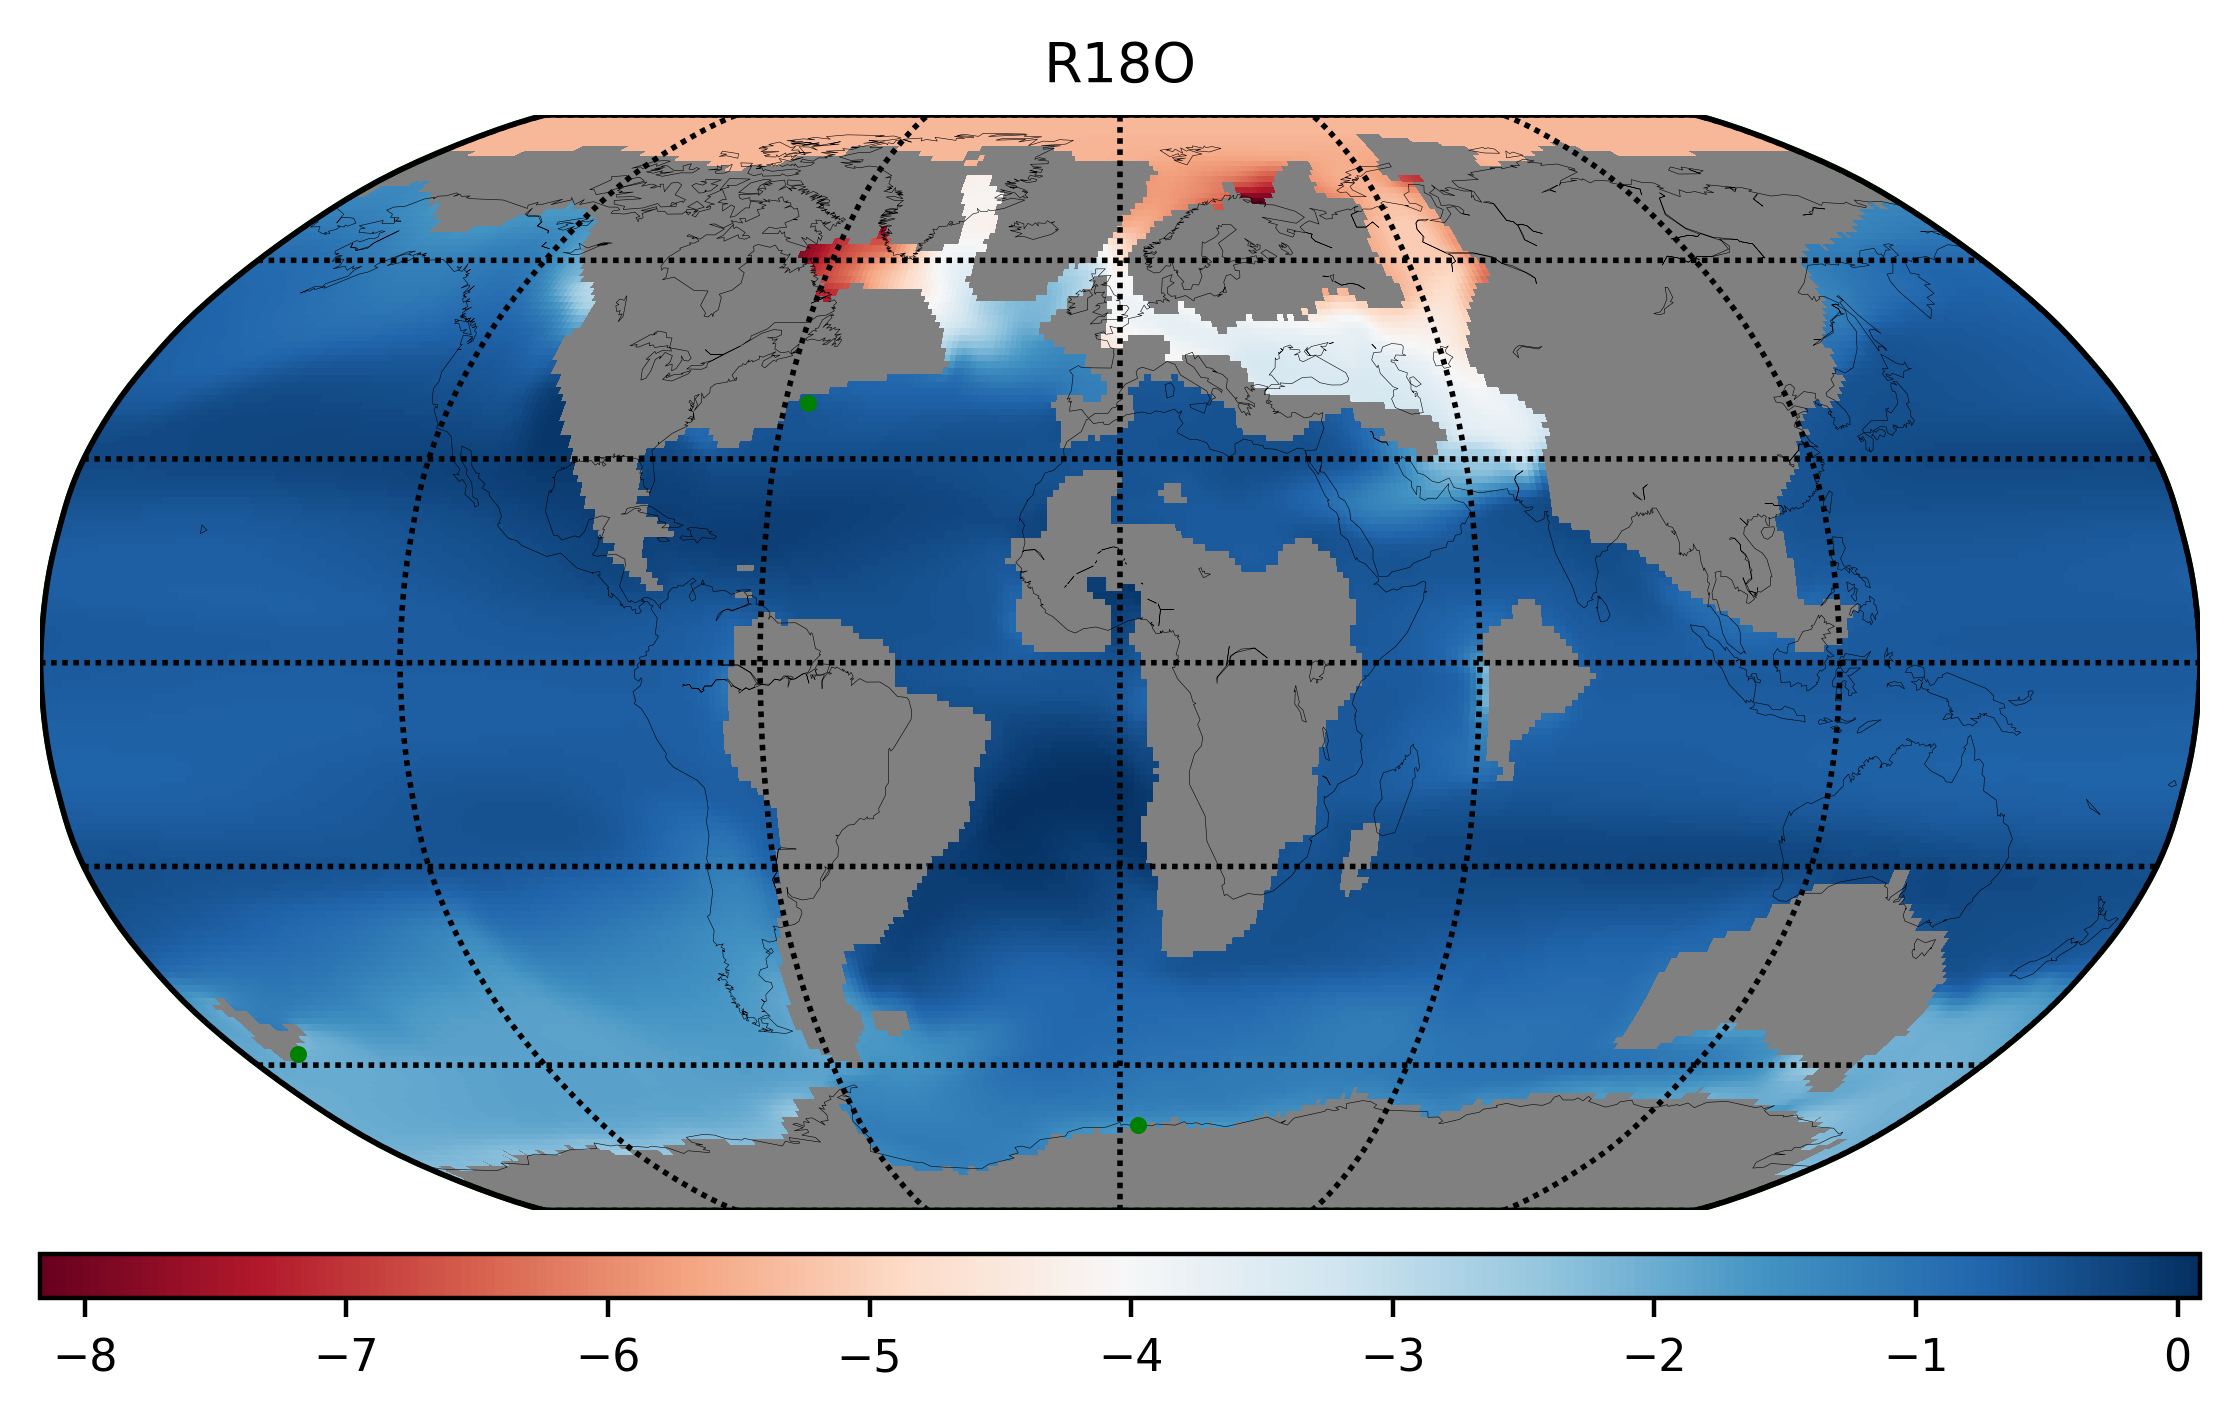

In [7]:
proxies = pandas.read_csv(proxydir + proxyfile)
proxies_len0 = len(proxies)
r18o_len = len(r18olist)

GridB_lon360 = np.arange(0.5,360,1)
GridB_lat180 = np.arange(-89.5,90.1,1)
#print(GridB_lon360.shape)
X, Y = np.meshgrid(GridB_lon360, GridB_lat180)

ploti = 1
plotd = 1

r18oall= np.full((proxies_len0,r18o_len),np.nan)
for k in range(r18o_len):
    print(r18olist[k])
    R18O = Dataset(r18odir+r18olist[k]).variables[varName]
    print(R18O.shape)
    for j in range(proxies_len0):
        if proxies['Type'][j] == typei:
            lat_dum = proxies[latid][j]
            lon_dum = proxies[lonid][j]
            
            lati = math.floor(lat_dum + 90)
            if lon_dum >= 0:
                loni = math.floor(lon_dum)
            else:
                loni = math.floor(lon_dum + 360)
            
            r18oi = 1000 * (np.mean(R18O[:,lati,loni]) - 1)
            
            r18oall[j,k] = r18oi
            
            #if k == 1:
            print('site {}. lat/lon {}/{} id {}/{}. mean {:1.5f}'.format(proxies['Site'][j],lat_dum,lon_dum,lati,loni,r18oi))
                #if proxies['Site'][j] in ['401']:
                    #print('  lat/lon {}/{}'.format(lat_dum,lon_dum+180))
                    #print(R18O[:,lati,loni])
            
    if ploti == 1 and k ==1:
        # plot figure
        fig = plt.figure(figsize=(6, 4.5), dpi=400)
        ax = fig.add_axes([0.05,0.05,0.9,0.9])
        m = Basemap(projection='robin', lon_0=0, lat_0 = 0)#, resolution=None)
        m.drawcoastlines(linewidth=0.1)
        # might consider 'cea', 'mbtfpq', 'moll', 'hammer', or 'robin' (recommended) projection
        m.drawmapboundary(fill_color='0.5', color='g')
        im1 = m.pcolormesh(X,Y,np.mean(R18O[:,:,:]-1,axis=0)*1000,shading='flat',cmap='RdBu',latlon=True)
        m.drawparallels(np.arange(-90.,99.,30.))
        m.drawmeridians(np.arange(-180.,180.,60.))
        cb = m.colorbar(im1,"bottom", size="4%", pad="4%")#, label='variance (\u2103$^2$)')
        cb.ax.tick_params(labelsize=8)
        ax.set_title('R18O', fontsize = 10)
        
        if plotd == 1:
            # plot data
            df1 = proxies[proxies['Type'] == typei]
            
            x,y = m(df1[lonid].to_numpy(), df1[latid].to_numpy())
            #df1i = 0
            #x,y = m(df1[lonid].to_numpy()[df1i], df1[latid].to_numpy()[df1i])
            m.plot(x, y, 'o',color='g', markersize=2, label = '\u03B4\u00B9\u2078O')
   # plt.savefig(r18olist[k] + '.pdf')
np.savetxt(r18oCESMname, r18oall, delimiter=',')